## **Separating Hyperplane**

It is the line (plane) that separates the different classes. They can be:

* Linear (Logistic Regression, SVMs - Linear kernels, NNs - Linear Activations)
* Non-Linear (Ensembles, NNs, ...)

In [1]:
from sklearn.datasets import make_circles

In [2]:
X, y = make_circles(1000, noise = .1)

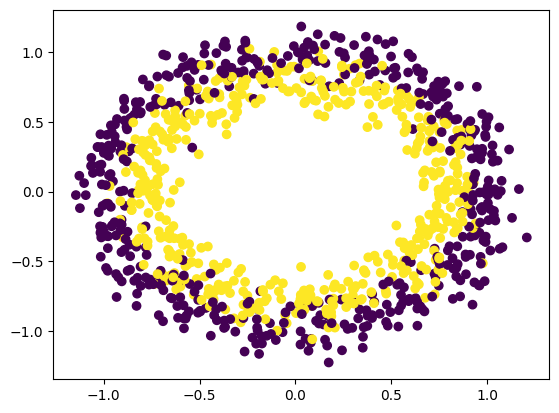

In [3]:
## y is binary
## X is two dimensional

import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [4]:
## plot the separating hyperplane
## this works with ALL datasets X
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting
    the model as we need to find the predicted value for every point in
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator

    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.Greys)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

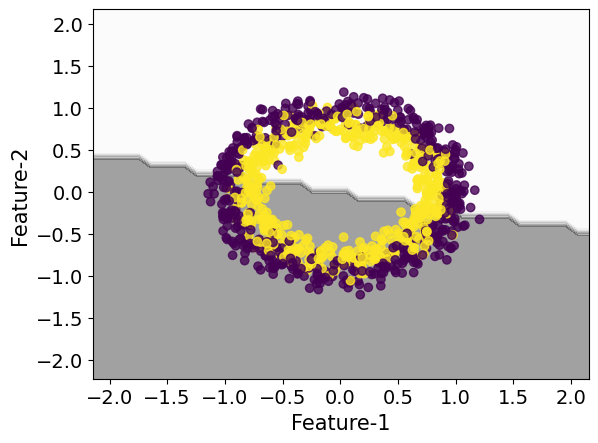

In [5]:
## Separating Hyperplane for Logistic Regresion
from sklearn.linear_model import LogisticRegression

plot_decision_boundaries(X, y, LogisticRegression)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

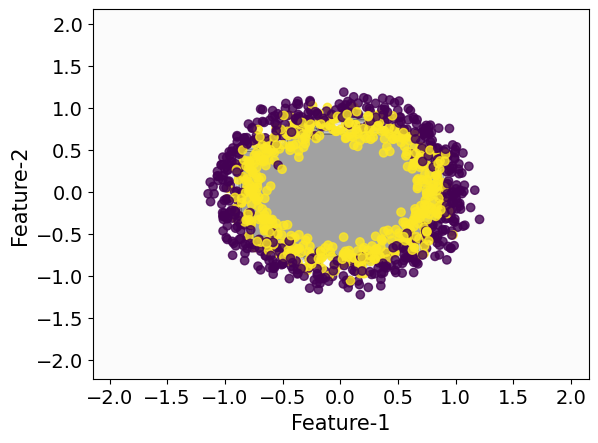

In [6]:
## Separating Hyperplane for RF
from sklearn.ensemble import RandomForestClassifier

plot_decision_boundaries(X, y, RandomForestClassifier, n_estimators = 300)

## **Binary Cross-Entropy**

THe loss function most commonly used in binary classification. It uses the natural log of the propensities.

In [7]:
import numpy as np

## natural log for propensities is ALWAYS negative
np.log(1)

0.0

In [8]:
## binary cross-entropy loss
def binary_crossentropy(y, phat):
  loss = -(y*np.log(phat) + (1-y)*np.log(1-phat))
  return loss

In [9]:
y = 0
phat = 0.9

binary_crossentropy(y, phat)

2.302585092994046

In [10]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

## **Real Data Set Example**

In [11]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/master/data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
## Let's create the y vector
y = pd.get_dummies(df.y, drop_first = True)

In [13]:
y.columns = ['Subscribed?']

<Axes: xlabel='Subscribed?'>

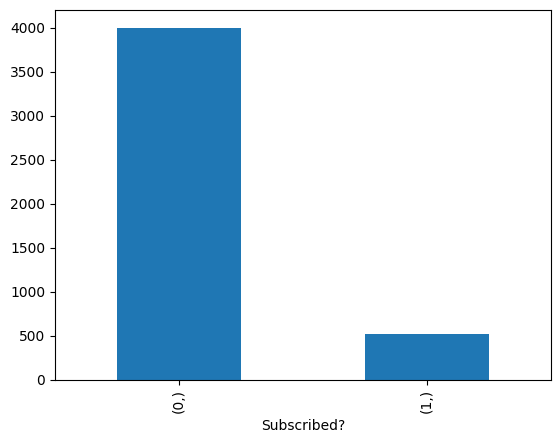

In [14]:
## Check for Imbalance
## SMOTE training so to reduce the influence of the class with most obs
y.value_counts().plot(kind = "bar")

In [15]:
y.value_counts() / len(y)

Subscribed?
0              0.88476
1              0.11524
dtype: float64

In [16]:
## X matrix

X = df.drop('y', axis = 1)
X.shape

(4521, 16)

In [17]:
## encode (dummy)
X = pd.get_dummies(X, drop_first = True)

In [18]:
## split into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 630)

In [19]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3285,36,1477,7,71,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
72,31,6248,9,154,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2579,46,477,20,128,6,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1838,35,839,23,50,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
793,49,1405,8,29,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,32,577,7,101,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1718,37,704,18,165,7,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4015,36,5902,23,219,4,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
829,35,714,26,135,22,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
## LOGISTIC REGRESSION
## by default an L2 penalty on the cost function
## J(w) is the binary crossentropy
## J(w) + ||w||_2^2
lr = LogisticRegression(max_iter = 2000)

lr.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000)

In [21]:
np.round(lr.coef_, 2)
## slopes of every variable

array([[-0.01,  0.  ,  0.01,  0.  , -0.06, -0.  , -0.08, -0.38, -0.39,
        -0.43,  0.06,  0.58, -0.11, -0.1 ,  0.08, -0.21, -0.3 ,  0.03,
        -0.56, -0.36,  0.05,  0.23, -0.3 ,  0.13, -0.15, -0.93, -0.19,
        -1.12, -0.41, -0.01,  0.01, -0.62, -0.89,  0.24,  0.84, -0.69,
        -0.91,  1.18,  0.16, -0.13,  2.07, -1.28]])

In [22]:
## LOGISTIC REGRESSION
## J(w) + ||w||_1

lr = LogisticRegression(penalty = "l1", solver = "liblinear", max_iter = 2000)

lr.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000, penalty='l1', solver='liblinear')

In [23]:
np.round(lr.coef_, 2)

array([[-0.01,  0.  ,  0.01,  0.  , -0.07, -0.  , -0.03, -0.25, -0.23,
        -0.55,  0.  ,  0.61,  0.  ,  0.  ,  0.09, -0.13, -0.21,  0.  ,
        -0.49, -0.31,  0.  ,  0.19, -0.31,  0.2 , -0.2 , -0.75, -0.17,
        -1.24, -0.29,  0.  ,  0.07, -0.87, -0.8 ,  0.39,  1.31, -0.6 ,
        -0.81,  1.5 ,  0.  ,  0.11,  2.36, -0.68]])